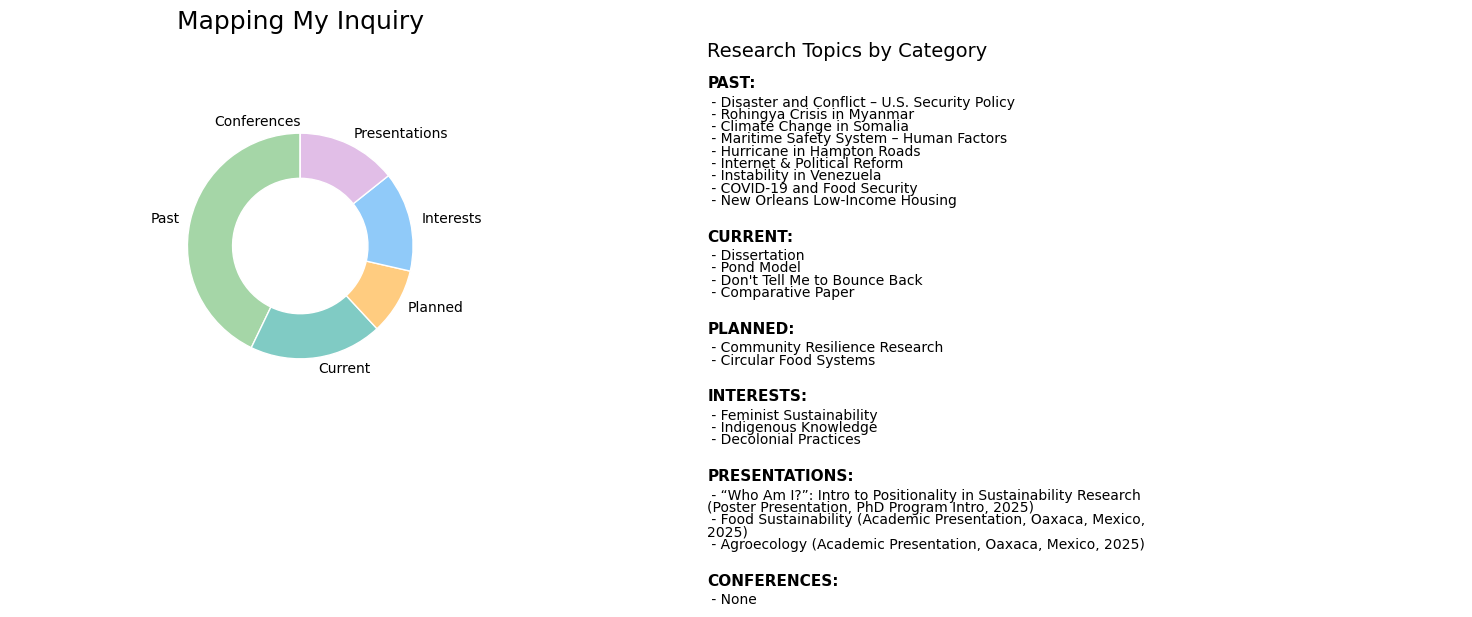

In [11]:
import matplotlib.pyplot as plt
import json
import textwrap

# Load research data
with open('research_data.json', 'r', encoding='utf-8') as f:
    topic_data = json.load(f)

# Extract chart data
labels = list(topic_data.keys())
sizes = [len(topic_data[cat]) for cat in labels]
colors = ['#a5d6a7', '#80cbc4', '#ffcc80', '#90caf9', '#e1bee7', '#f8bbd0']

# Bigger layout for a fuller donut
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [1, 1.3]})

# Centered and larger donut
wedges, texts = ax1.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=90,
    radius=1.0,  # Slightly larger donut
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}
)
ax1.axis('equal')
ax1.set_title("Mapping My Inquiry", fontsize=18, pad=30)

# Text layout on the right
ax2.axis('off')
ax2.set_title("Research Topics by Category", fontsize=14, loc='left', pad=10)

# Format the topic list
text_y = 0.95
line_spacing = 0.035
category_spacing = 0.05

for category, items in topic_data.items():
    # Section title
    ax2.text(0, text_y, f"{category.upper()}:", fontsize=11, weight='bold', ha='left')
    text_y -= line_spacing * 1.5

    # Section content
    if isinstance(items, list) and len(items) > 0:
        for item in items:
            if isinstance(item, dict):
                title = item.get('title', 'Untitled')
                type_ = item.get('type', '')
                context = item.get('context', '')
                year = item.get('year', '')
                line = f" - {title} ({type_}, {context}, {year})"
            else:
                line = f" - {item}"
            wrapped_lines = textwrap.wrap(line, width=65)
            for w in wrapped_lines:
                ax2.text(0, text_y, w, fontsize=10, ha='left')
                text_y -= line_spacing
    else:
        ax2.text(0, text_y, " - None", fontsize=10, ha='left')
        text_y -= line_spacing

    text_y -= line_spacing * 2  # Space between categories

# Layout & export
fig.tight_layout(pad=4.5)
plt.savefig('donut.png')
plt.show()
